In [1]:
#importing all the dependecies needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import datetime as dt

In [2]:
#we are going with the train_csv so we import the dataset
bigmart_df = pd.read_csv("datasets/train.csv")

In [3]:
#checking for the first five dataset
bigmart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking informations of the dataset
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#to check if there is any duplicated rows
bigmart_df.duplicated().any()

False

In [6]:
#checking for any missing value
bigmart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we have two columns with missing values


DATA CLEANING


In [7]:
#if the missing value are less than 5% we can drop the rows of the missing values
#to calculate the percentage of the values missing
per = bigmart_df.isnull().sum() * 100/len(bigmart_df)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Both columns have over 5% of missing data so we will find the best way to fill the missing values without altering our original dataset.

They are two major technics in filling missing values
UNIVARIATE which include( mean, median,mode, interpolation, constant value) and BIVARIATE which include( regression, k-nearest neighbors,etc.

In [8]:
#Trying out different methods to know which one fills the missing values the best without altering our original dataset
bigmart_df["Item_Weight_mean"] =bigmart_df["Item_Weight"].fillna(bigmart_df["Item_Weight"].mean())

bigmart_df["Item_Weight_median"] =bigmart_df["Item_Weight"].fillna(bigmart_df["Item_Weight"].median())

In [9]:
#checking variance before and after inputing the mean and median
# the variance should always be close with the original variance of the dataset

print("original weight variance", bigmart_df["Item_Weight"].var())
print("mean weight  variance", bigmart_df["Item_Weight_mean"].var())
print("median weight variance", bigmart_df["Item_Weight_median"].var())

original weight variance 21.561688259836558
mean weight  variance 17.86012173506058
median weight variance 17.869561454073647


From our result the variance are close which is good
so we will plot a graph to know if the original graph of the dataset will also be close with the graph we will get after filling the missing value with mean or median.

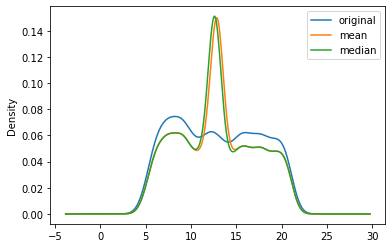

In [10]:
bigmart_df["Item_Weight"].plot(kind="kde", label = "original")

bigmart_df["Item_Weight_mean"].plot(kind="kde", label = "mean")
bigmart_df["Item_Weight_median"].plot(kind="kde", label = "median")

plt.legend()
plt.show()

From the plot above, it is very clear that filling with mean or median will alter our original dataset since most of the dataset were clustered in the middle due to the mean or median used.

In [11]:
#We will try another method in filling the missing values.
#checking if linear interpolation can be used to fill the missing values
#USING LINEAR INTERPOLATION#
bigmart_df["Item_Weight_interpolate"] =bigmart_df["Item_Weight"].interpolate(method = "linear")

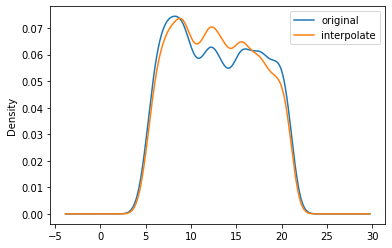

In [12]:
#We will also plot a graph to know if the original dataset distribution is close with interpolation method.
bigmart_df["Item_Weight"].plot(kind="kde", label = "original")

bigmart_df["Item_Weight_interpolate"].plot(kind="kde", label = "interpolate")


plt.legend()
plt.show()

From the plots the distribution are close and better than the mean and median.

We will also try another method from the bivariate method to know if we can use it to fill the missing values

In [13]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors = 10, weights ="distance")

bigmart_df["knn_imputer"] = knn.fit_transform(bigmart_df[["Item_Weight"]]).ravel()

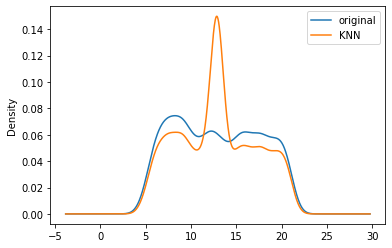

In [14]:
#comparing the k-nearest neighbors method with the original dataset using graph
bigmart_df["Item_Weight"].plot(kind="kde", label = "original")

bigmart_df["knn_imputer"] .plot(kind="kde", label = "KNN")


plt.legend()
plt.show()


From the dataset above, the datasets where clustered in the middle.
so from all the method used, the linear interpolation method is the best filling method to use in this instance.

In [15]:
#replacing the missing values
#using linear interpolation to replace the values in "item weight"
bigmart_df["Item_Weight"].fillna(bigmart_df["Item_Weight"].interpolate(method = "linear"), inplace = True)

In [16]:
bigmart_df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate,knn_imputer
7035,FDM12,16.7,Regular,0.070312,Baking Goods,189.6214,OUT017,2007,NaN,Tier 2,Supermarket Type1,2826.321,16.7,16.7,16.7,16.7


In [17]:

bigmart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_median              0
Item_Weight_interpolate         0
knn_imputer                     0
dtype: int64

from the info above the missing value on item_weight has been taken care of using the linear interpolation method.

In categorical dataset we cant use numerical value to input the missing value,
but we can use mode to fill in the missing values.
also note that when filling with mode there are different strategies that can be used. 

In this case we will try to compare our outlet_size column with another column in which both are very corelated.
#in the dataset columns, outlet_type has a great influence on the outlet_size so we will compare it with outlet_type.

Using mode to replace the value in "outlet_size"

In [18]:
mode_of_outlet_size = bigmart_df.pivot_table(values = 'Outlet_Size',columns ='Outlet_Type', aggfunc =(lambda x: x.mode()[0]))

In [19]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
missing_value = bigmart_df['Outlet_Size'].isnull()

In [21]:
bigmart_df.loc[missing_value, 'Outlet_Size'] = bigmart_df.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [22]:
bigmart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_mean             0
Item_Weight_median           0
Item_Weight_interpolate      0
knn_imputer                  0
dtype: int64

since the missing value has been taken care of, we will ckeck our colunms to check if there is any more missing values in any of those columns.




In [23]:
bigmart_df["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [24]:
bigmart_df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

from above, there are some disarrangement in the item_fat_content columns
so we will assign LF, low fat - Low fat
and assign reg - Regular

In [25]:
bigmart_df.replace({"Item_Fat_Content": {"LF" :"Low Fat", "low fat" : "Low Fat", "reg": "Regular" }}, inplace =True)

In [26]:

#checking to see if the the problem has been rectified
bigmart_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
bigmart_df["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

from the values above there are 526 values that are 0, which means there is a problem with the data columns.

We will also use linear interpolation to fill in the missing values here.

In [28]:
bigmart_df["Item_Visibility_interpolate"] =bigmart_df["Item_Visibility"].replace(0,np.nan).interpolate(method = "linear")

In [29]:
#checking to know if the missing values has been changed
bigmart_df["Item_Visibility_interpolate"].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

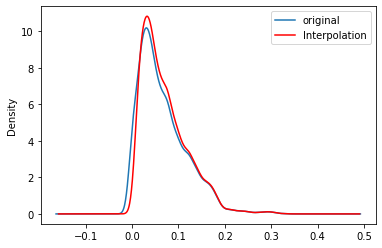

In [30]:
#checking the distribution after and before with interpolation to be sure it didnt affect the original dataset for item_vissibility
bigmart_df["Item_Visibility"].plot(kind="kde", label = "original")

bigmart_df["Item_Visibility_interpolate"] .plot(kind="kde",color ="red", label = "Interpolation")


plt.legend()
plt.show()

In [31]:
bigmart_df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [32]:
#since most of the columns started with either FD, NC, DR, etc.
#i will use the first two letters to identify them

bigmart_df["Item_Identifier"] = bigmart_df["Item_Identifier"].apply(lambda x : x[:2])

In [33]:
bigmart_df["Item_Identifier"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [34]:
bigmart_df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [35]:
#To convert them to age 
current_year = dt.datetime.today().year

current_year

2024

In [36]:
bigmart_df["Outlet_age"] = current_year - bigmart_df["Outlet_Establishment_Year"]

In [37]:
#checking if the age was sucessfully converted
bigmart_df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate,knn_imputer,Item_Visibility_interpolate,Outlet_age
0,FD,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3,9.3,9.3,0.016047,25


In [38]:
#At the end of "handling the missing values" i will drop the colunms i don't need.
bigmart_df.drop([ "Outlet_Establishment_Year","Item_Visibility","Item_Weight_mean","Item_Weight_median","Item_Weight_interpolate","knn_imputer"], axis = 1, inplace = True)

Data Visualization
lets have more insight into what our data looks like

In [39]:
sns.set() # this is used to give a theme to our graphs

C:\Users\Manav\AppData\Local\Temp\ipykernel_27720\880364946.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_df["Item_Weight"])


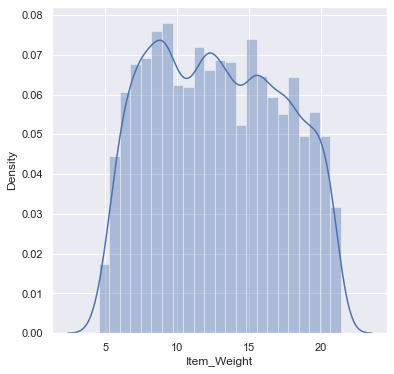

In [40]:
plt.figure(figsize =(6,6))
sns.distplot(bigmart_df["Item_Weight"])
plt.show()

<Figure size 432x432 with 0 Axes>

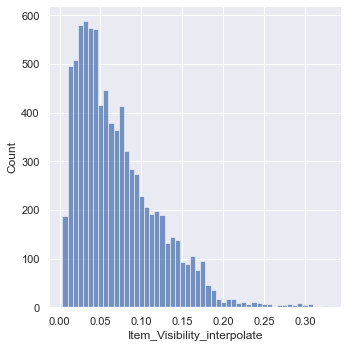

In [41]:
plt.figure(figsize =(6,6))
sns.displot(bigmart_df["Item_Visibility_interpolate"])
plt.show()

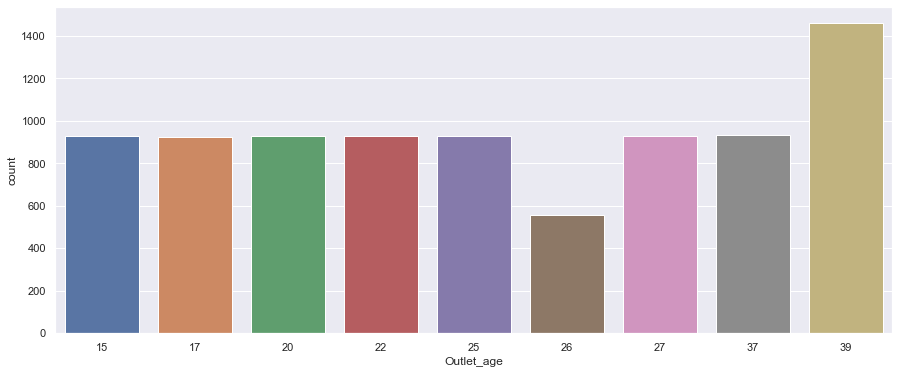

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(data= bigmart_df, x="Outlet_age" )
plt.show()

<Figure size 1800x432 with 0 Axes>

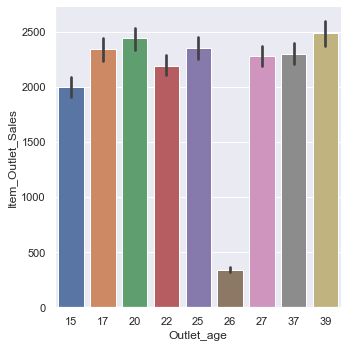

In [43]:
plt.figure(figsize=(25,6))
sns.catplot(data= bigmart_df, x="Outlet_age", y="Item_Outlet_Sales", kind="bar")
plt.show()

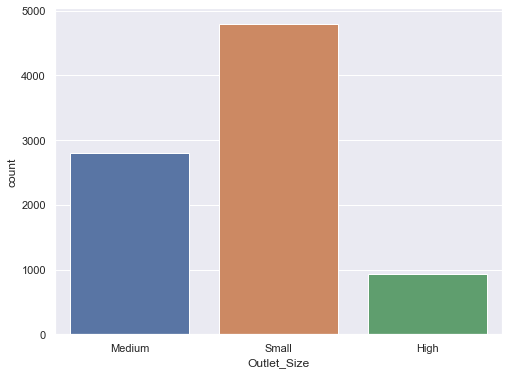

In [44]:

plt.figure(figsize=(8,6))
sns.countplot(data= bigmart_df, x="Outlet_Size")
plt.show()

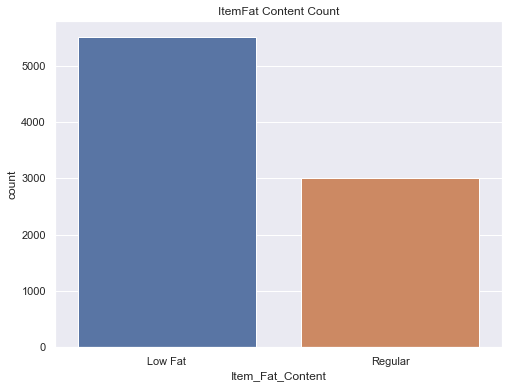

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data= bigmart_df, x="Item_Fat_Content")
plt.title("ItemFat Content Count")
plt.show()

ENCODING

we will encode the categorical columns we will be needing to numerical columns

In [46]:
#LABEL ENCODING
coder = LabelEncoder()
bigmart_df["Item_Identifier"] = coder.fit_transform(bigmart_df["Item_Identifier"])
bigmart_df["Item_Fat_Content"] = coder.fit_transform(bigmart_df["Item_Fat_Content"])
bigmart_df["Item_Type"] = coder.fit_transform(bigmart_df["Item_Type"])
bigmart_df["Outlet_Identifier"] = coder.fit_transform(bigmart_df["Outlet_Identifier"])
bigmart_df["Outlet_Size"] = coder.fit_transform(bigmart_df["Outlet_Size"])
bigmart_df["Outlet_Location_Type"] = coder.fit_transform(bigmart_df["Outlet_Location_Type"])
bigmart_df["Outlet_Type"] = coder.fit_transform(bigmart_df["Outlet_Type"])

In [47]:
bigmart_df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate,Outlet_age
Item_Identifier,1.000000,0.056939,-0.166111,0.007456,0.032517,-0.009730,-0.001276,0.007661,0.001136,0.011236,-0.046347,0.008551
Item_Weight,0.056939,1.000000,-0.015030,0.028262,0.024839,-0.006937,-0.014556,0.005960,-0.000858,0.014536,-0.012096,-0.001220
Item_Fat_Content,-0.166111,-0.015030,1.000000,-0.139434,0.006063,0.000764,-0.001262,-0.001598,0.002199,0.018719,0.048694,-0.003151
Item_Type,0.007456,0.028262,-0.139434,1.000000,0.032651,0.001656,-0.000218,0.003084,0.003053,0.017048,-0.033981,-0.004970
Item_MRP,0.032517,0.024839,0.006063,0.032651,1.000000,0.003319,0.000872,0.000232,-0.001975,0.567574,-0.006544,-0.005020
Outlet_Identifier,-0.009730,-0.006937,0.000764,0.001656,0.003319,1.000000,0.260272,-0.716176,0.099873,0.162325,-0.102528,-0.079035
Outlet_Size,-0.001276,-0.014556,-0.001262,-0.000218,0.000872,0.260272,1.000000,-0.480075,-0.401373,-0.162753,0.098213,-0.425534
Outlet_Location_Type,0.007661,0.005960,-0.001598,0.003084,0.000232,-0.716176,-0.480075,1.000000,0.467219,0.089367,-0.030813,0.089216
Outlet_Type,0.001136,-0.000858,0.002199,0.003053,-0.001975,0.099873,-0.401373,0.467219,1.000000,0.401522,-0.179788,0.122304
Item_Outlet_Sales,0.011236,0.014536,0.018719,0.017048,0.567574,0.162325,-0.162753,0.089367,0.401522,1.000000,-0.133874,0.049135


from the chart below there is a good correlation between item_outlet_sale with item_MRP and outlet_Type.
so we can deduce that:
1, An increase in Item_MRP will result to higher price(Item_Outlet_Sale)
2,Higher outlet_type will also result to increase in the Item_outlet_sale 


In [48]:
bigmart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate,Outlet_age
0,1,9.30,0,4,249.8092,9,1,0,1,3735.1380,0.016047,25
1,0,5.92,1,14,48.2692,3,1,2,2,443.4228,0.019278,15
2,1,17.50,0,10,141.6180,9,1,0,1,2097.2700,0.016760,25
3,1,19.20,1,6,182.0950,0,2,2,0,732.3800,0.015755,26
4,2,8.93,0,9,53.8614,1,0,2,1,994.7052,0.014751,37


Spltting the Features and target

In [49]:
X = bigmart_df.drop(columns = "Item_Outlet_Sales", axis = 1)
y = bigmart_df["Item_Outlet_Sales"]

Splitting the data into training data and testing data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =2)

Machine learning Model Training

In [51]:
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
#Prediction on training data
training_data_prediction = xg.predict(X_train)

In [53]:
#R-squared value for train_data
r2_train = metrics.r2_score(y_train, training_data_prediction)

print("R-squared value for train data =", r2_train)

R-squared value for train data = 0.8743719828705219


In [54]:
#Prediction on testing data
testing_data_prediction = xg.predict(X_test)

In [55]:
#R-squared value for test_data
r2_test = metrics.r2_score(y_test, testing_data_prediction)

print("R-squared value for test_data =", r2_test)

R-squared value for test_data = 0.5109242182102149


In [56]:
#USING MEAN_ABSOLUTE_ERROR

#for training data
mean_absolute_error(y_train, training_data_prediction)

436.37837256541997

In [57]:
#for testing data
mae= mean_absolute_error(y_test, testing_data_prediction)
print(mae)

865.5705518787743


PREDICTION ON UNSEEN DATA

In [58]:
pred = xg.predict(np.array([[1,9.3,0,4,249.8092,9,1,0,1,0.016047301,25]]))

print(pred)

[4184.5493]


In [59]:
print(f"Sales value is in between {pred-865.57} and {pred+865.57}")

Sales value is in between [3318.9792] and [5050.119]
